In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AndhraP_Health_Insurance_Data.csv',parse_dates=["PREAUTH_DATE", "CLAIM_DATE", "SURGERY_DATE", "DISCHARGE_DATE"])
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9164\3153962856.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('AndhraP_Health_Insurance_Data.csv',parse_dates=["PREAUTH_DATE", "CLAIM_DATE", "SURGERY_DATE", "DISCHARGE_DATE"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9164\3153962856.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('AndhraP_Health_Insurance_Data.csv',parse_dates=["PREAUTH_DATE", "CLAIM_DATE", "SURGERY_DATE", "DISCHARGE_DATE"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_9164\3153962856.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format

,Sno,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,12500,2017-03-22,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-06-08,2013-07-09,NO,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,12500,2017-03-22,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-08-08,2013-09-09,NO,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,12500,2017-03-22,11500,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-08-15,2013-10-18,NO,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,12500,2017-03-22,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-08-24,2013-09-27,NO,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,12500,2017-03-22,11000,"Rims Govt. General Hospital, Srikakulam",G,Srikakulam,2013-08-31,2013-02-10,NO,D


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479688 entries, 0 to 479687
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sno               479688 non-null  int64         
 1   AGE               479688 non-null  int64         
 2   SEX               479688 non-null  object        
 3   CASTE_NAME        479688 non-null  object        
 4   CATEGORY_CODE     479688 non-null  object        
 5   CATEGORY_NAME     479688 non-null  object        
 6   SURGERY_CODE      479688 non-null  object        
 7   SURGERY           479688 non-null  object        
 8   VILLAGE           479688 non-null  object        
 9   MANDAL_NAME       479688 non-null  object        
 10  DISTRICT_NAME     479688 non-null  object        
 11  PREAUTH_DATE      479688 non-null  datetime64[ns]
 12  PREAUTH_AMT       479688 non-null  int64         
 13  CLAIM_DATE        479688 non-null  datetime64[ns]
 14  CLAI

In [4]:
df.isnull().mean()*100

Sno                 0.0
AGE                 0.0
SEX                 0.0
CASTE_NAME          0.0
CATEGORY_CODE       0.0
CATEGORY_NAME       0.0
SURGERY_CODE        0.0
SURGERY             0.0
VILLAGE             0.0
MANDAL_NAME         0.0
DISTRICT_NAME       0.0
PREAUTH_DATE        0.0
PREAUTH_AMT         0.0
CLAIM_DATE          0.0
CLAIM_AMOUNT        0.0
HOSP_NAME           0.0
HOSP_TYPE           0.0
HOSP_DISTRICT       0.0
SURGERY_DATE        0.0
DISCHARGE_DATE      0.0
Mortality Y / N     0.0
SRC_REGISTRATION    0.0
dtype: float64

In [5]:
df['SEX'] = df['SEX'].replace({'FEMALE': 'Female', 'MALE': 'Male'})

In [6]:
gender_count = df.groupby('SEX').agg(count=('SEX', 'size'))     
print(gender_count) 

                count
SEX                  
Female         178968
Female(Child)   14925
Male           260727
Male(Child)     25068


# Bivariant Analysis

# 1. scatter plot (num+ num)

In [7]:
df.describe()

,Sno,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,479688.0000,479688.000000,479688.000000,479688.000000
mean,239844.5000,44.912264,30428.941698,27652.205861
std,138474.1423,18.961084,27441.592281,25951.706037
min,1.0000,0.000000,5.000000,2.000000
25%,119922.7500,34.000000,12500.000000,12500.000000
50%,239844.5000,47.000000,25000.000000,23200.000000
75%,359766.2500,59.000000,35000.000000,30600.000000
max,479688.0000,107.000000,520000.000000,520000.000000


In [8]:
# scatter plot ---> 2 numarical, 1 cat

<Axes: xlabel='AGE', ylabel='PREAUTH_AMT'>

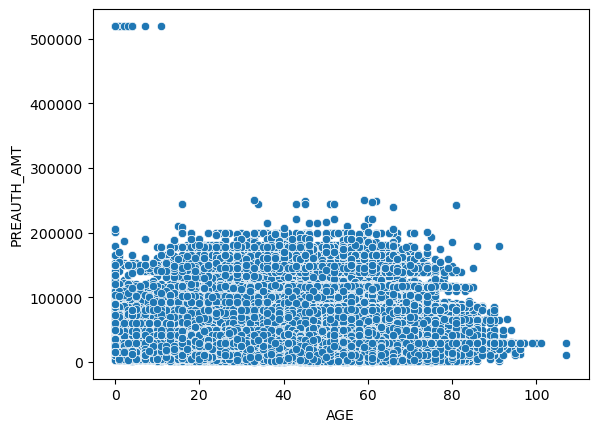

In [9]:
sns.scatterplot(x=df['AGE'], y=df['PREAUTH_AMT'])

<Axes: xlabel='AGE', ylabel='CLAIM_AMOUNT'>

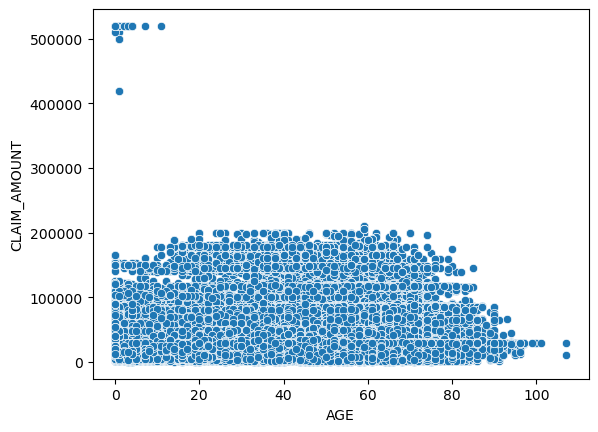

In [10]:
sns.scatterplot(x=df['AGE'], y=df['CLAIM_AMOUNT'])

<Axes: xlabel='PREAUTH_AMT', ylabel='CLAIM_AMOUNT'>

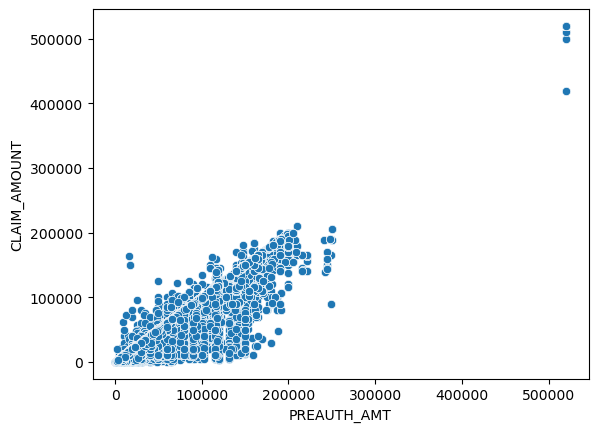

In [11]:
sns.scatterplot(x=df['PREAUTH_AMT'], y=df['CLAIM_AMOUNT'])

<Axes: xlabel='PREAUTH_AMT', ylabel='CLAIM_AMOUNT'>

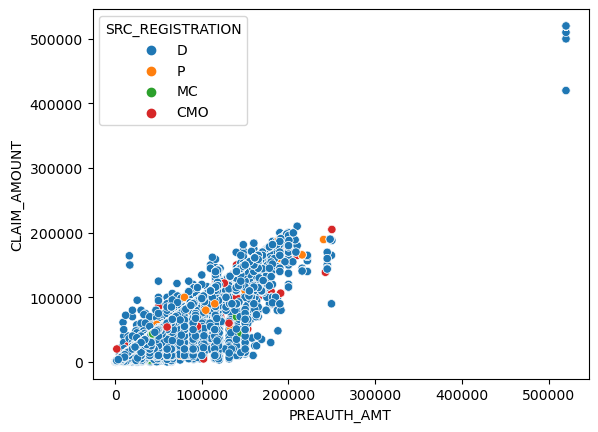

In [13]:
sns.scatterplot(x=df['PREAUTH_AMT'], y=df['CLAIM_AMOUNT'], hue=df['SRC_REGISTRATION'])

In [15]:
# Q. Is there a relationship between the age of patients and the claim amount?

<Axes: xlabel='AGE', ylabel='PREAUTH_AMT'>

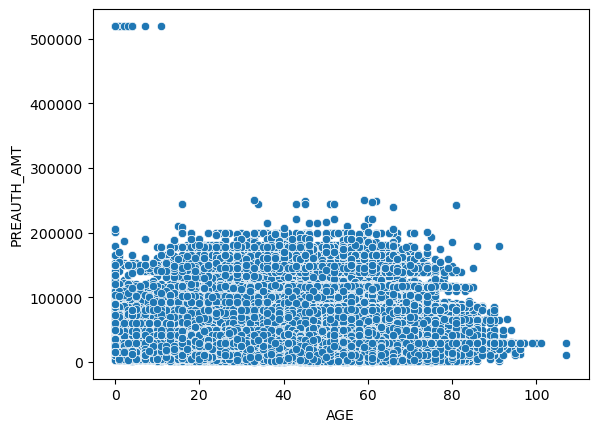

In [22]:
sns.scatterplot(x=df['AGE'], y=df['PREAUTH_AMT'])

In [23]:
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['CLAIM_AMOUNT'] = pd.to_numeric(df['CLAIM_AMOUNT'], errors='coerce')

age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column for age groups
df['Age_Group'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=True)
age_group_claims = df.groupby('Age_Group')['CLAIM_AMOUNT'].sum()
print(age_group_claims)

Age_Group
0-20       999625436
21-40     2983949612
41-60     5643974003
61-80     2979649625
81-100      92769798
Name: CLAIM_AMOUNT, dtype: int64


In [24]:
df.shape

(479688, 23)

In [25]:
df['Age_Group']

0         41-60
1         21-40
2         41-60
3         41-60
4         41-60
          ...  
479683    21-40
479684    41-60
479685    21-40
479686    41-60
479687    61-80
Name: Age_Group, Length: 479688, dtype: category
Categories (5, object): ['0-20' < '21-40' < '41-60' < '61-80' < '81-100']

# RESULT

In [164]:
# age group 41-60  has highest claim_amount :5643974003
# C: Corporate hospital (private hospitals) has 79.77% amount of Preautharized amount and G has 20.22%
# per destrict i can see claim amount---> "Guntur" desctict has high claim amt that is "mean : 31,048.74"  i.e "11.80 %"
# Correlation between Preauthorization Amount and Claim Amount: 0.96
# CASTE_NAME "BC" backkward calss has maximun no of claimns that is 51.31%
in 
# discharge per year no of claims are increasing  ... till 2013 to 2017 , in 2017-- 3,39,022 no of claims that is 70%  
#Q.9  DISTRICT_NAME "GUNTUR" has 11.80% that is highest claim 2nd is "East Godavari" has 10.92% of claim 
# Does the SRC_REGISTRATION type affect the mortality rate?==no
# q11. How does the category code impact the preauthorization amount? --> code m6 is 7%
# q12. Is there a difference in claim amounts between male and female patients? YEs male has 57% claim amount
# caste OC has maximum preauthrization amount  24.01%
# Q14. claim amount incresing day by day (last )
# ----------------------------  MULTI----------------















SyntaxError: invalid syntax (162750208.py, line 6)

In [28]:
# Q.2 Does the hospital type (government/private) influence the preauthorization amount?

In [31]:
df['PREAUTH_AMT'] = pd.to_numeric(df['PREAUTH_AMT'], errors='coerce')
hospital_preauth = df.groupby('HOSP_TYPE')['PREAUTH_AMT'].agg(['sum', 'mean', 'count'])
hospital_preauth['percentage'] = (hospital_preauth['sum'] / hospital_preauth['sum'].sum()) * 100

print(hospital_preauth)


                   sum          mean   count  percentage
HOSP_TYPE                                               
C          11644380836  31527.025705  369346   79.775714
G           2952017349  26753.342780  110342   20.224286


<Axes: ylabel='HOSP_TYPE'>

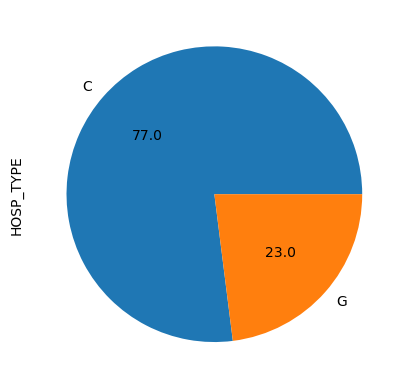

In [30]:
df['HOSP_TYPE'].value_counts().plot(kind='pie', autopct= "%0.1f")

In [36]:
# Q3. How does gender affect the frequency of different surgeries?

In [37]:
# Group by GENDER and SURGERY_TYPE (or similar column) and count the occurrences
gender_surgery_frequency = df.groupby(['SEX', 'CATEGORY_NAME']).size().unstack()

# Display the results
print(gender_surgery_frequency)


CATEGORY_NAME  CARDIAC AND CARDIOTHORACIC SURGERY  CARDIOLOGY  \
SEX                                                             
Female                                    13245.0      5380.0   
Female(Child)                              1046.0        16.0   
Male                                      28804.0     13218.0   
Male(Child)                                1106.0        15.0   

CATEGORY_NAME  COCHLEAR IMPLANT SURGERY  CRITICAL CARE  DERMATOLOGY  \
SEX                                                                   
Female                              NaN          743.0         33.0   
Female(Child)                      27.0            9.0          NaN   
Male                                NaN         1562.0         48.0   
Male(Child)                        47.0            7.0          1.0   

CATEGORY_NAME  ENDOCRINOLOGY  ENT  SURGERY  GASTROENTEROLOGY  \
SEX                                                            
Female                 285.0        6738.0            

In [38]:
# Q4. Is there a difference in claim amounts between different districts?

# Automation

In [49]:
def get_claim_amount_by_district(df, district_name):
    district_data = df[df['DISTRICT_NAME'] == district_name]    
    district_claim_stats = district_data['CLAIM_AMOUNT'].agg(['sum', 'mean', 'count'])    
    district_claim_stats['percentage'] = (district_claim_stats['sum'] / df['CLAIM_AMOUNT'].sum()) * 100  
    district_claim_stats['sum'] = f"{district_claim_stats['sum']:,.0f}"  
    district_claim_stats['mean'] = f"{district_claim_stats['mean']:,.2f}"  
    district_claim_stats['count'] = f"{district_claim_stats['count']:,}"  
    district_claim_stats['percentage'] = f"{district_claim_stats['percentage']:.2f}%" 
    
    print(f"Claim amount statistics for {district_name}:")
    print(district_claim_stats)

In [50]:
get_claim_amount_by_district(df, 'Vishakhapatnam') 

Claim amount statistics for Vishakhapatnam:
sum           947,701,462
mean            25,977.95
count            36,481.0
percentage          7.14%
Name: CLAIM_AMOUNT, dtype: object


In [52]:
get_claim_amount_by_district(df, 'Srikakulam') 

Claim amount statistics for Srikakulam:
sum           693,052,144
mean            25,593.71
count            27,079.0
percentage          5.22%
Name: CLAIM_AMOUNT, dtype: object


In [53]:
get_claim_amount_by_district(df, 'Kurnool') 

Claim amount statistics for Kurnool:
sum           915,537,179
mean            28,598.92
count            32,013.0
percentage          6.90%
Name: CLAIM_AMOUNT, dtype: object


In [54]:
get_claim_amount_by_district(df, 'Vizianagaram') 

Claim amount statistics for Vizianagaram:
sum           647,497,628
mean            25,097.78
count            25,799.0
percentage          4.88%
Name: CLAIM_AMOUNT, dtype: object


In [55]:
get_claim_amount_by_district(df, 'Guntur') 

Claim amount statistics for Guntur:
sum           1,565,353,251
mean              31,048.74
count              50,416.0
percentage           11.80%
Name: CLAIM_AMOUNT, dtype: object


In [56]:
get_claim_amount_by_district(df, 'West Godavari') 

Claim amount statistics for West Godavari:
sum           1,145,265,266
mean              27,936.71
count              40,995.0
percentage            8.63%
Name: CLAIM_AMOUNT, dtype: object


In [57]:
get_claim_amount_by_district(df, 'Krishna') 

Claim amount statistics for Krishna:
sum           1,301,529,542
mean              31,015.38
count              41,964.0
percentage            9.81%
Name: CLAIM_AMOUNT, dtype: object


In [58]:
get_claim_amount_by_district(df, 'East Godavari') 

Claim amount statistics for East Godavari:
sum           1,449,551,642
mean              26,166.14
count              55,398.0
percentage           10.93%
Name: CLAIM_AMOUNT, dtype: object


In [59]:
get_claim_amount_by_district(df, 'Prakasam') 

Claim amount statistics for Prakasam:
sum           997,766,661
mean            28,655.81
count            34,819.0
percentage          7.52%
Name: CLAIM_AMOUNT, dtype: object


In [60]:
get_claim_amount_by_district(df, 'Nellore') 

Claim amount statistics for Nellore:
sum           1,039,923,655
mean              26,105.12
count              39,836.0
percentage            7.84%
Name: CLAIM_AMOUNT, dtype: object


In [65]:
# Q.5 Does the surgery type affect the mortality rate?

In [67]:
df['SURGERY'].nunique()

923

In [68]:
df['CATEGORY_NAME'].unique()

array(['NEPHROLOGY', 'CARDIAC AND CARDIOTHORACIC SURGERY', 'CARDIOLOGY',
       'COCHLEAR IMPLANT SURGERY', 'ORTHOPEDIC  SURGERY AND PROCEDURES',
       'MEDICAL ONCOLOGY', 'PEDIATRICS',
       'GYNAECOLOGY AND OBSTETRICS  SURGERY', 'RADIATION ONCOLOGY',
       'GENITO URINARY SURGERIES', 'NEUROLOGY', 'POLY TRAUMA',
       'NEUROSURGERY', 'RHEUMATOLOGY', 'GENERAL SURGERY',
       'GASTROENTEROLOGY', 'PLASTIC SURGERY', 'OPHTHALMOLOGY  SURGERY',
       'PULMONOLOGY', 'GENERAL MEDICINE', 'CRITICAL CARE', 'ENT  SURGERY',
       'ENDOCRINOLOGY', 'SURGICAL ONCOLOGY', 'PEDIATRIC SURGERIES',
       'SURGICAL GASTRO ENTEROLOGY', 'DERMATOLOGY', 'PROSTHESES',
       'INFECTIOUS DISEASES'], dtype=object)

In [69]:
df['CATEGORY_NAME'].nunique()

29

In [76]:
def analyze_mortality_by_surgery_type(df, category_name):
    # Convert MORTALITY_STATUS to binary (1 = YES, 0 = NO)
    df['Mortality Y / N'] = df['Mortality Y / N'].map({'YES': 1, 'NO': 0})    
    category_data = df[df['CATEGORY_NAME'] == category_name]    
    mortality_stats = category_data['Mortality Y / N'].agg(['sum', 'count'])    
    mortality_rate = (mortality_stats['sum'] / mortality_stats['count']) * 100 if mortality_stats['count'] > 0 else 0    
    result = {
        'Surgery Type': category_name, 
        'Mortality Count': int(mortality_stats['sum']),
        'Total Cases': int(mortality_stats['count']),
        'Mortality Rate': f"{mortality_rate:.2f}%",
    }
    print(result)

In [77]:
analyze_mortality_by_surgery_type(df, 'NEPHROLOGY')


{'Surgery Type': 'NEPHROLOGY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [78]:
analyze_mortality_by_surgery_type(df, 'CARDIAC AND CARDIOTHORACIC SURGER')

{'Surgery Type': 'CARDIAC AND CARDIOTHORACIC SURGER', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [79]:
analyze_mortality_by_surgery_type(df, 'CARDIOLOGY')

{'Surgery Type': 'CARDIOLOGY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [80]:
analyze_mortality_by_surgery_type(df, 'COCHLEAR IMPLANT SURGERY')

{'Surgery Type': 'COCHLEAR IMPLANT SURGERY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [81]:
analyze_mortality_by_surgery_type(df, 'ORTHOPEDIC  SURGERY AND PROCEDURES')

{'Surgery Type': 'ORTHOPEDIC  SURGERY AND PROCEDURES', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [82]:
analyze_mortality_by_surgery_type(df, 'MEDICAL ONCOLOGY')

{'Surgery Type': 'MEDICAL ONCOLOGY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [83]:
analyze_mortality_by_surgery_type(df, 'PEDIATRICS')

{'Surgery Type': 'PEDIATRICS', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [84]:
analyze_mortality_by_surgery_type(df, 'GYNAECOLOGY AND OBSTETRICS  SURGERY')

{'Surgery Type': 'GYNAECOLOGY AND OBSTETRICS  SURGERY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [85]:
analyze_mortality_by_surgery_type(df, 'RADIATION ONCOLOGY')

{'Surgery Type': 'RADIATION ONCOLOGY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [86]:
analyze_mortality_by_surgery_type(df, 'GENITO URINARY SURGERIES')

{'Surgery Type': 'GENITO URINARY SURGERIES', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [87]:
analyze_mortality_by_surgery_type(df, 'NEUROLOGY')

{'Surgery Type': 'NEUROLOGY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [88]:
analyze_mortality_by_surgery_type(df, 'POLY TRAUMA')

{'Surgery Type': 'POLY TRAUMA', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [89]:
analyze_mortality_by_surgery_type(df, 'NEUROSURGERY')
# 'NEUROSURGERY', 'RHEUMATOLOGY', 'GENERAL SURGERY',

{'Surgery Type': 'NEUROSURGERY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [90]:
analyze_mortality_by_surgery_type(df, 'RHEUMATOLOGY')

{'Surgery Type': 'RHEUMATOLOGY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [91]:
analyze_mortality_by_surgery_type(df, 'GENERAL SURGERY')

{'Surgery Type': 'GENERAL SURGERY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [92]:
analyze_mortality_by_surgery_type(df, 'GASTROENTEROLOGY')
#  'GASTROENTEROLOGY', 'PLASTIC SURGERY', 'OPHTHALMOLOGY  SURGERY',

{'Surgery Type': 'GASTROENTEROLOGY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [93]:
analyze_mortality_by_surgery_type(df, 'PLASTIC SURGERY')

{'Surgery Type': 'PLASTIC SURGERY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [94]:
analyze_mortality_by_surgery_type(df, 'OPHTHALMOLOGY SURGERY')

{'Surgery Type': 'OPHTHALMOLOGY SURGERY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [98]:
analyze_mortality_by_surgery_type(df, 'PULMONOLOGY')
# 'PULMONOLOGY', 'GENERAL MEDICINE', 'CRITICAL CARE', 'ENT  SURGERY',
#        'ENDOCRINOLOGY', 'SURGICAL ONCOLOGY', 'PEDIATRIC SURGERIES',
#        'SURGICAL GASTRO ENTEROLOGY', 'DERMATOLOGY', 'PROSTHESES',
#        'INFECTIOUS DISEASES'

{'Surgery Type': 'PULMONOLOGY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [99]:
analyze_mortality_by_surgery_type(df, 'GENERAL MEDICINE')

{'Surgery Type': 'GENERAL MEDICINE', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [100]:
analyze_mortality_by_surgery_type(df, 'CRITICAL CARE')

{'Surgery Type': 'CRITICAL CARE', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [101]:
analyze_mortality_by_surgery_type(df, 'ENT  SURGERY')

{'Surgery Type': 'ENT  SURGERY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [102]:
analyze_mortality_by_surgery_type(df, 'ENDOCRINOLOGY')

{'Surgery Type': 'ENDOCRINOLOGY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [103]:
analyze_mortality_by_surgery_type(df, 'SURGICAL ONCOLOGY')

{'Surgery Type': 'SURGICAL ONCOLOGY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [104]:
analyze_mortality_by_surgery_type(df, 'PEDIATRIC SURGERIES')

{'Surgery Type': 'PEDIATRIC SURGERIES', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [105]:
analyze_mortality_by_surgery_type(df, 'SURGICAL GASTRO ENTEROLOGY')

{'Surgery Type': 'SURGICAL GASTRO ENTEROLOGY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [106]:
analyze_mortality_by_surgery_type(df, 'DERMATOLOGY')

{'Surgery Type': 'DERMATOLOGY', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [107]:
analyze_mortality_by_surgery_type(df, 'PROSTHESES')

{'Surgery Type': 'PROSTHESES', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [108]:
analyze_mortality_by_surgery_type(df, 'INFECTIOUS DISEASES')

{'Surgery Type': 'INFECTIOUS DISEASES', 'Mortality Count': 0, 'Total Cases': 0, 'Mortality Rate': '0.00%'}


In [113]:
# Q.6 What is the correlation between preauthorization amount and claim amount?

In [117]:
def calculate_correlation(df):
    if 'PREAUTH_AMT' in df.columns and 'CLAIM_AMOUNT' in df.columns:
        correlation = df['PREAUTH_AMT'].corr(df['CLAIM_AMOUNT'])
        return correlation
    else:
        raise KeyError("The required columns 'PREAUTHORIZATION_AMOUNT' and 'CLAIM_AMOUNT' are missing.")
correlation_value = calculate_correlation(df)
print(f"Correlation between Preauthorization Amount and Claim Amount: {correlation_value:.2f}")

Correlation between Preauthorization Amount and Claim Amount: 0.96


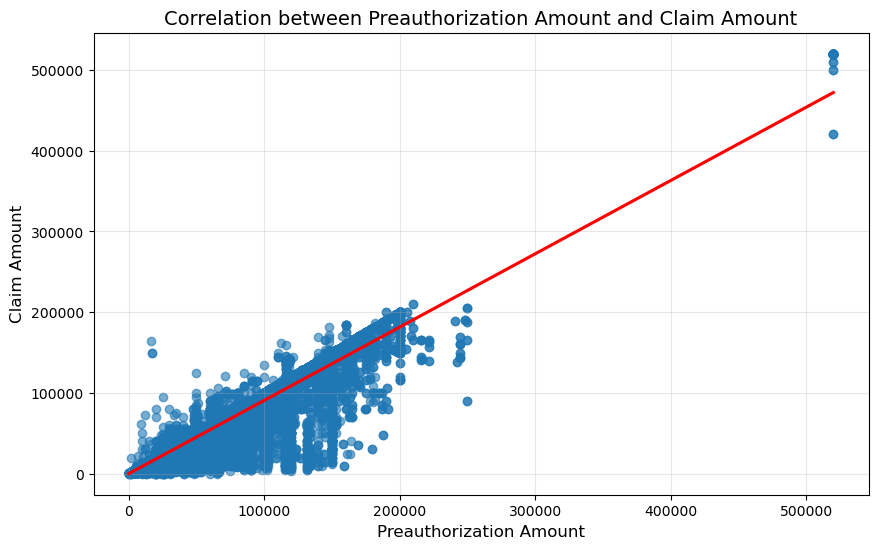

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation(df):
    if 'PREAUTH_AMT' in df.columns and 'CLAIM_AMOUNT' in df.columns:
        plt.figure(figsize=(10, 6))        
        sns.regplot(
            x='PREAUTH_AMT', 
            y='CLAIM_AMOUNT', 
            data=df, 
            scatter_kws={'alpha': 0.6}, 
            line_kws={'color': 'red'}
        )        
        plt.title('Correlation between Preauthorization Amount and Claim Amount', fontsize=14)
        plt.xlabel('Preauthorization Amount', fontsize=12)
        plt.ylabel('Claim Amount', fontsize=12)
        plt.grid(alpha=0.3)
        plt.show()
    else:
        raise KeyError("The required columns 'PREAUTHORIZATION_AMOUNT' and 'CLAIM_AMOUNT' are missing.")
plot_correlation(df)

In [121]:
# Q7. How does caste impact the average claim amount?

In [126]:
def analyze_claim_amount_by_caste(df):
    if 'CASTE_NAME' in df.columns and 'CLAIM_AMOUNT' in df.columns:
        caste_claim_stats = df.groupby('CASTE_NAME')['CLAIM_AMOUNT'].agg(['mean', 'count']).reset_index()        
        caste_claim_stats.rename(columns={'mean': 'Average Claim Amount', 'count': 'Number of Claims'}, inplace=True)
        total_claims = caste_claim_stats['Number of Claims'].sum()
        caste_claim_stats['% no of total Claims'] = (caste_claim_stats['Number of Claims'] / total_claims) * 100
        
        
        return caste_claim_stats
    else:
        raise KeyError("The required columns 'CASTE' and 'CLAIM_AMOUNT' are missing.")
caste_claim_analysis = analyze_claim_amount_by_caste(df)
print(caste_claim_analysis)

   CASTE_NAME  Average Claim Amount  Number of Claims  % no of total Claims
0          BC          27304.098532            246164             51.317523
1  Minorities          29497.979760             29150              6.076867
2          OC          28274.426750            114123             23.791089
3      Others          27393.283019               371              0.077342
4          SC          27307.511636             76742             15.998316
5          ST          26695.138834             13138              2.738864


In [ ]:
# Q8. Does the discharge date affect the claim amount?

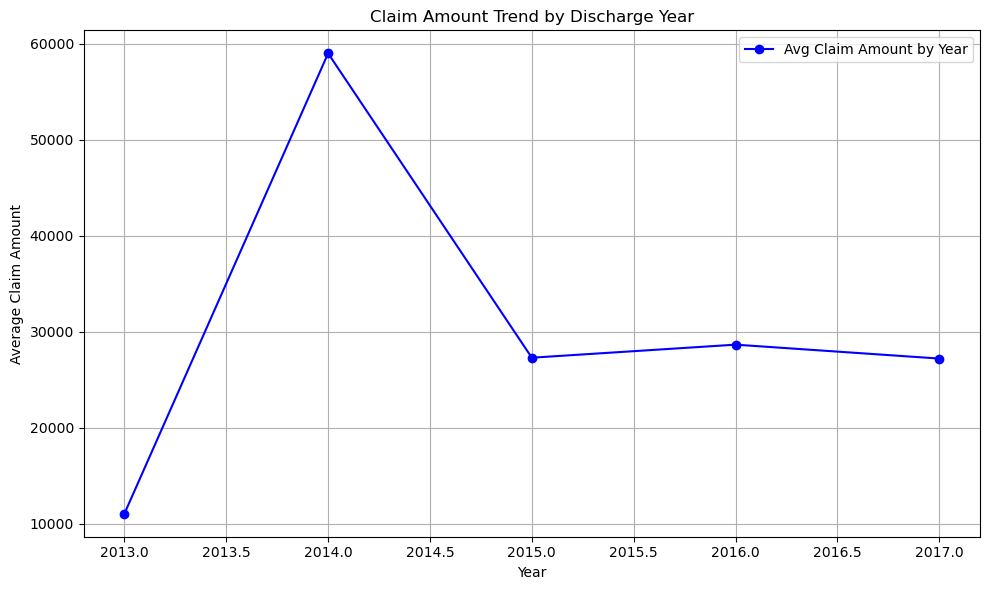

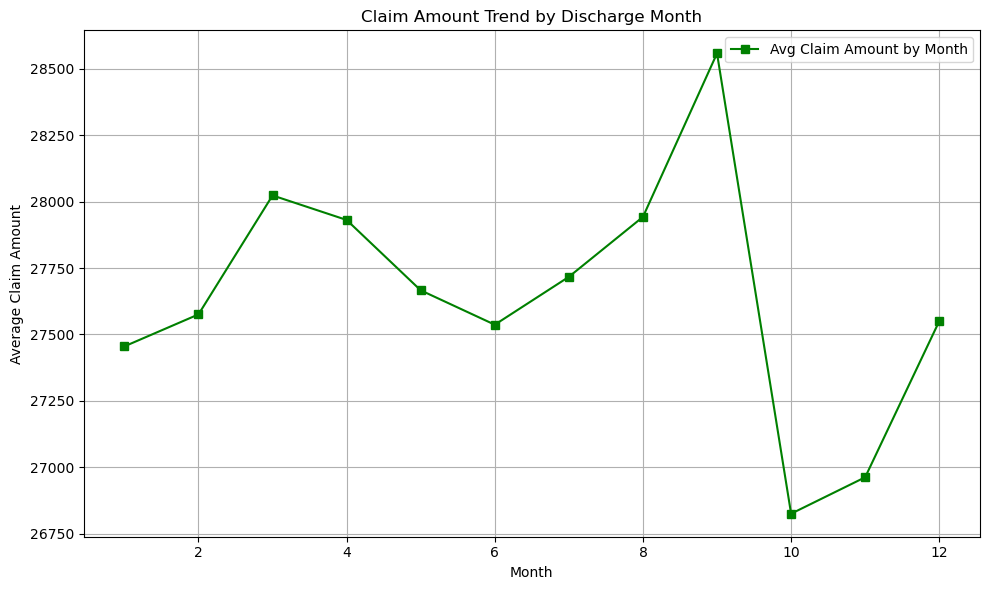

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_claim_amount_by_discharge_date(df):
    if 'DISCHARGE_DATE' in df.columns and 'CLAIM_AMOUNT' in df.columns:
        # Convert DISCHARGE_DATE to datetime format
        df['DISCHARGE_DATE'] = pd.to_datetime(df['DISCHARGE_DATE'], errors='coerce')
        
        # Extract year and month from discharge date
        df['Year'] = df['DISCHARGE_DATE'].dt.year
        df['Month'] = df['DISCHARGE_DATE'].dt.month
        df['Day_of_Week'] = df['DISCHARGE_DATE'].dt.dayofweek  # Optional: for more granular analysis
        
        # Calculate average claim amount by Year
        claim_by_year = df.groupby('Year')['CLAIM_AMOUNT'].mean().reset_index()
        
        # Calculate average claim amount by Month
        claim_by_month = df.groupby('Month')['CLAIM_AMOUNT'].mean().reset_index()
        
        # Plotting average claim amount by year
        plt.figure(figsize=(10, 6))
        plt.plot(claim_by_year['Year'], claim_by_year['CLAIM_AMOUNT'], marker='o', color='b', label='Avg Claim Amount by Year')
        plt.xlabel('Year')
        plt.ylabel('Average Claim Amount')
        plt.title('Claim Amount Trend by Discharge Year')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Plotting average claim amount by month
        plt.figure(figsize=(10, 6))
        plt.plot(claim_by_month['Month'], claim_by_month['CLAIM_AMOUNT'], marker='s', color='g', label='Avg Claim Amount by Month')
        plt.xlabel('Month')
        plt.ylabel('Average Claim Amount')
        plt.title('Claim Amount Trend by Discharge Month')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        return claim_by_year, claim_by_month
    else:
        raise KeyError("The required columns 'DISCHARGE_DATE' and 'CLAIM_AMOUNT' are missing.")

# Example usage:
claim_analysis_by_year, claim_analysis_by_month = analyze_claim_amount_by_discharge_date(df)


In [133]:
def analyze_claim_amount_by_year(df):
    if 'DISCHARGE_DATE' in df.columns and 'CLAIM_AMOUNT' in df.columns:
        df['DISCHARGE_DATE'] = pd.to_datetime(df['DISCHARGE_DATE'], errors='coerce')        
        df['Year'] = df['DISCHARGE_DATE'].dt.year        
        yearly_claim_stats = df.groupby('Year')['CLAIM_AMOUNT'].agg(['mean', 'count']).reset_index()        
        total_claims = df['CLAIM_AMOUNT'].count()
        yearly_claim_stats['Claim Percentage'] = (yearly_claim_stats['count'] / total_claims) * 100        
        yearly_claim_stats.rename(columns={
            'mean': 'Average Claim Amount', 
            'count': 'Number of Claims',
            'Claim Percentage': '% of Total Claims'}, inplace=True)
        return yearly_claim_stats
    else:
        raise KeyError("The required columns 'DISCHARGE_DATE' and 'CLAIM_AMOUNT' are missing.")
claim_analysis_by_year = analyze_claim_amount_by_year(df)
print(claim_analysis_by_year)

   Year  Average Claim Amount  Number of Claims  % of Total Claims
0  2013          11071.428571                 7           0.001459
1  2014          59009.451613                62           0.012925
2  2015          27316.222832               911           0.189915
3  2016          28674.809229            139686          29.120178
4  2017          27226.376925            339022          70.675522


In [134]:
# Q9. How does the claim date vary across different districts?

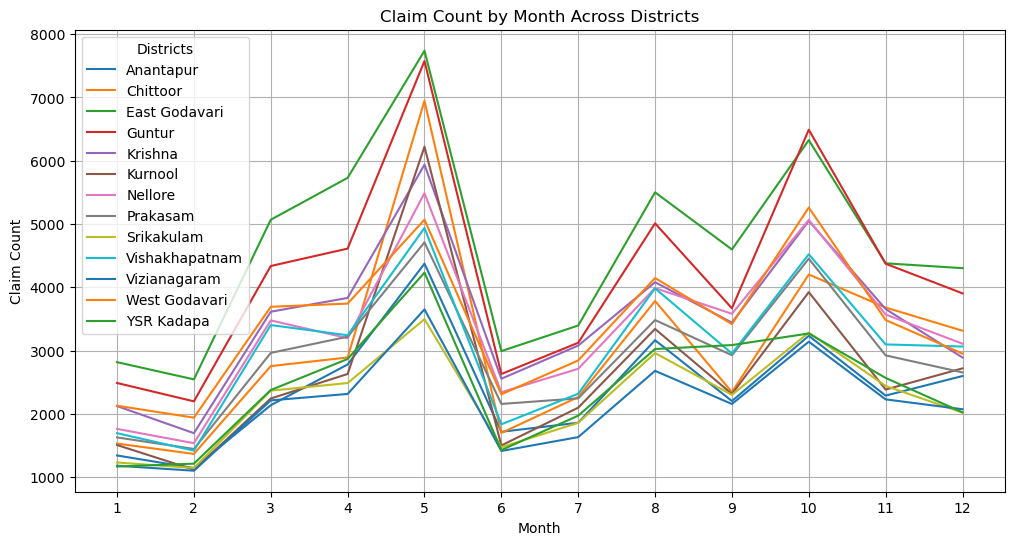

In [136]:
import matplotlib.pyplot as plt
def analyze_claim_date_by_district(df):
    if 'CLAIM_DATE' in df.columns and 'DISTRICT_NAME' in df.columns:
        df['CLAIM_DATE'] = pd.to_datetime(df['CLAIM_DATE'], errors='coerce')        
        df['Year'] = df['CLAIM_DATE'].dt.year
        df['Month'] = df['CLAIM_DATE'].dt.month
        df['Day'] = df['CLAIM_DATE'].dt.day        
        claim_date_stats = df.groupby(['DISTRICT_NAME', 'Year', 'Month']).size().reset_index(name='Claim Count')

        return claim_date_stats
    else:
        raise KeyError("The required columns 'CLAIM_DATE' and 'DISTRICT' are missing.")

# Example usage:
claim_date_by_district = analyze_claim_date_by_district(df)

# To visualize the data, you can create a plot:
plt.figure(figsize=(12, 6))
for district in claim_date_by_district['DISTRICT_NAME'].unique():
    district_data = claim_date_by_district[claim_date_by_district['DISTRICT_NAME'] == district]
    plt.plot(district_data['Month'], district_data['Claim Count'], label=district)

plt.title("Claim Count by Month Across Districts")
plt.xlabel("Month")
plt.ylabel("Claim Count")
plt.legend(title="Districts")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


In [142]:
def analyze_claim_amount_by_district(df):
    if 'CLAIM_DATE' in df.columns and 'DISTRICT_NAME' in df.columns and 'CLAIM_AMOUNT' in df.columns:
        district_claim_stats = df.groupby('DISTRICT_NAME')['CLAIM_AMOUNT'].sum().reset_index(name='Total Claim Amount')        
        top_districts = district_claim_stats.sort_values(by='Total Claim Amount', ascending=False).head(5)        
        total_claim_amount = district_claim_stats['Total Claim Amount'].sum()
        top_districts['Claim Amount %'] = (top_districts['Total Claim Amount'] / total_claim_amount) * 100
        return top_districts
    else:
        raise KeyError("The required columns 'CLAIM_DATE', 'DISTRICT_NAME', and 'CLAIM_AMOUNT' are missing.")

In [143]:
top_5_districts_by_claim_amount = analyze_claim_amount_by_district(df)
print(top_5_districts_by_claim_amount)

    DISTRICT_NAME  Total Claim Amount  Claim Amount %
3          Guntur          1565353251       11.801134
2   East Godavari          1449551642       10.928110
4         Krishna          1301529542        9.812177
11  West Godavari          1145265266        8.634108
6         Nellore          1039923655        7.839941


In [ ]:
# DISTRICT_NAME "GUNTUR" has 11.80% that is highest claim
# 2nd is "East Godavari" has 10.92% of claim 

In [144]:
# Q10. Does the SRC_REGISTRATION type affect the mortality rate?

In [162]:
def analyze_mortality_rate_by_registration_type(df):
    if 'SRC_REGISTRATION' in df.columns and 'Mortality Y / N' in df.columns:
        df['Mortality Y / N'] = df['Mortality Y / N'].map({'YES': 1, 'NO': 0})        
        registration_mortality = df.groupby('SRC_REGISTRATION')['Mortality Y / N'].agg(['mean', 'count']).reset_index()        
        registration_mortality.rename(columns={'mean': 'Mortality Rate', 'count': 'Total Cases'}, inplace=True)
        return registration_mortality
    else:
        raise KeyError("The required columns 'SRC_REGISTRATION' and 'Mortality Y / N' are missing.")
mortality_by_registration = analyze_mortality_rate_by_registration_type(df)
print(mortality_by_registration)

  SRC_REGISTRATION  Mortality Rate  Total Cases
0              CMO             NaN            0
1                D             NaN            0
2               MC             NaN            0
3                P             NaN            0


In [163]:
def map_category_names(df):
    if 'CATEGORY_CODE' in df.columns and 'CATEGORY_NAME' in df.columns:
        category_mapping = df.drop_duplicates(subset=['CATEGORY_CODE', 'CATEGORY_NAME'])[['CATEGORY_CODE', 'CATEGORY_NAME']]        
#         df['category_name_mapped'] = df['category_code'].map(category_mapping.set_index('category_code')['category_name'])
        return df
    else:
        raise KeyError("The 'category_code' or 'category_name' column is missing in the dataset.")
df = map_category_names(df)
print(df[['CATEGORY_CODE', 'CATEGORY_NAME']].drop_duplicates())

       CATEGORY_CODE                        CATEGORY_NAME
0                 M6                           NEPHROLOGY
8                 S7   CARDIAC AND CARDIOTHORACIC SURGERY
11                M5                           CARDIOLOGY
16               S16             COCHLEAR IMPLANT SURGERY
24                S5   ORTHOPEDIC  SURGERY AND PROCEDURES
30               S12                     MEDICAL ONCOLOGY
73                M4                           PEDIATRICS
78                S4  GYNAECOLOGY AND OBSTETRICS  SURGERY
92               S13                   RADIATION ONCOLOGY
102               S9             GENITO URINARY SURGERIES
111               M7                            NEUROLOGY
114              S15                          POLY TRAUMA
124              S10                         NEUROSURGERY
128              M10                         RHEUMATOLOGY
130               S1                      GENERAL SURGERY
133              M12                     GASTROENTEROLOGY
137           

In [165]:
# Q.11 How does the category code impact the preauthorization amount?

In [193]:
def get_preauthorization_by_category(df, CATEGORY_CODE):
    if 'CATEGORY_CODE' in df.columns and 'PREAUTH_AMT' in df.columns:
        filtered_df = df[df['CATEGORY_CODE'] == CATEGORY_CODE]   
        total_preauth_amt = df['PREAUTH_AMT'].sum()
        category_preauth_amt = filtered_df['PREAUTH_AMT'].sum()
        preauth_percentage = (category_preauth_amt / total_preauth_amt) * 100 if total_preauth_amt > 0 else 0

        preauth_summary = {
            'Category Code': CATEGORY_CODE,
            'Mean Preauthorization Amount': filtered_df['PREAUTH_AMT'].mean(),
            'Median Preauthorization Amount': filtered_df['PREAUTH_AMT'].median(),
            'Standard Deviation': filtered_df['PREAUTH_AMT'].std(),
            'Number of Records': filtered_df.shape[0],
            'Preauthorization Amount Percentage': preauth_percentage
        }     
        return preauth_summary
    else:
        raise KeyError("The required columns 'CATEGORY_CODE' and 'PREAUTH_AMT' are missing.")

In [194]:
CATEGORY_CODE = 'M6' 
result = get_preauthorization_by_category(df, CATEGORY_CODE)
for key, value in result.items():
    print(f"{key}: {value}")
# print(result)

Category Code: M6
Mean Preauthorization Amount: 14309.566173429223
Median Preauthorization Amount: 12500.0
Standard Deviation: 5720.986367411123
Number of Records: 74947
Preauthorization Amount Percentage: 7.347422579236797


In [196]:
CATEGORY_CODE = 'S14' 
result = get_preauthorization_by_category(df, CATEGORY_CODE)
for key, value in result.items():
    print(f"{key}: {value}")

Category Code: S14
Mean Preauthorization Amount: 61115.50535077289
Median Preauthorization Amount: 50000.0
Standard Deviation: 29614.758073273424
Number of Records: 1682
Preauthorization Amount Percentage: 0.7042578497593925


In [197]:
# Q.12 Is there a difference in claim amounts between male and female patients?

In [202]:
if 'SEX' in df.columns and 'CLAIM_AMOUNT' in df.columns:
    sex_stats = (
        df.groupby('SEX')['CLAIM_AMOUNT']
        .agg(['mean', 'count', 'sum'])  
        .reset_index()
        .rename(columns={
            'mean': 'Mean Claim Amount',
            'count': 'Number of Records',
            'sum': 'Total Claim Amount'
        })
    )    
    total_claims = sex_stats['Total Claim Amount'].sum()    
    sex_stats['% of Claim Amount'] = (sex_stats['Total Claim Amount'] / total_claims) * 100    
    sex_stats = sex_stats.drop(columns=['Total Claim Amount'])    
    print(sex_stats)
else:
    raise KeyError("The required columns 'SEX' and 'CLAIM_AMOUNT' are missing.")  

             SEX  Mean Claim Amount  Number of Records  % of Claim Amount
0         Female       24868.346464             178968          33.553178
1  Female(Child)       30199.778760              14925           3.398048
2           Male       29292.437530             260727          57.577511
3    Male(Child)       28950.536022              25068           5.471264


In [204]:
# Q.13 Are there differences in preauthorization amounts across different categories?

In [210]:
# Check if the required columns are present
if 'CASTE_NAME' in df.columns and 'PREAUTH_AMT' in df.columns:
    # Group by CASTE_NAME and calculate the required statistics
    caste_preauth_stats = (
        df.groupby('CASTE_NAME')['PREAUTH_AMT']
        .agg(['mean', 'count'])
        .reset_index()
        .rename(columns={
            'mean': 'AVG Preauth_Amount',
            'count': 'Number of Records'
        })
    )
    
    # Calculate the total preauthorization amount for all categories
    total_preauth_amount = df['PREAUTH_AMT'].sum()
    
    # Calculate the percentage of preauthorization amounts for each category
    caste_preauth_stats['% of Preauth_Amount'] = (
        df.groupby('CASTE_NAME')['PREAUTH_AMT'].sum().values / total_preauth_amount * 100
    )
    
    # Display the result
    print(caste_preauth_stats)
else:
    raise KeyError("The required columns 'CASTE_NAME' and 'PREAUTH_AMT' are missing.")


   CASTE_NAME  AVG Preauth_Amount  Number of Records  % of Preauth_Amount
0          BC        30052.029066             246164            50.681871
1  Minorities        32509.461029              29150             6.492360
2          OC        30719.920375             114123            24.018593
3      Others        31004.970350                371             0.078806
4          SC        30443.787040              76742            16.006121
5          ST        30244.351576              13138             2.722249


In [ ]:
# caste BC has maximum preauthrization amount  50%

In [217]:
# Q14. Does the surgery date impact the claim amount?

In [223]:
# Ensure required columns are present
if 'SURGERY_DATE' in df.columns and 'CLAIM_AMOUNT' in df.columns:
    # Check if SURGERY_DATE is in datetime format; if not, convert it
    if not pd.api.types.is_datetime64_any_dtype(df['SURGERY_DATE']):
        df['SURGERY_DATE'] = pd.to_datetime(df['SURGERY_DATE'], errors='coerce')
    
    # Drop rows with invalid or missing surgery dates
    df = df.dropna(subset=['SURGERY_DATE'])
    
    # Extract the year from SURGERY_DATE
    df['SURGERY_YEAR'] = df['SURGERY_DATE'].dt.year
    
    # Group by surgery year and calculate statistics for claim amounts
    surgery_claim_stats_yearly = (
        df.groupby('SURGERY_YEAR')['CLAIM_AMOUNT']
        .agg(['mean', 'sum', 'count'])
        .reset_index()
        .rename(columns={
            'SURGERY_YEAR': 'SurgeryYear',
            'mean': 'Avg_ClaimAmt',
            'sum': 'Total_ClaimAmt',
            'count': 'No of Records'
        })
    )
    
    # Calculate the total claim amount across all years
    total_claim_amount = surgery_claim_stats_yearly['Total_ClaimAmt'].sum()
    
    # Calculate the percentage of total claim amounts for each year
    surgery_claim_stats_yearly['% of ClaimAmount'] = (
        (surgery_claim_stats_yearly['Total_ClaimAmt'] / total_claim_amount) * 100
    )
    
    # Display the results
    print(surgery_claim_stats_yearly)
else:
    raise KeyError("The required columns 'SURGERY_DATE' and 'CLAIM_AMOUNT' are missing.")


   SurgeryYear  Avg_ClaimAmt  Total_ClaimAmt  No of Records  % of ClaimAmount
0         2013  11071.428571           77500              7          0.000584
1         2014  57341.187500         3669836             64          0.027667
2         2015  26612.976037        28875079           1085          0.217688
3         2016  28514.216657      4269690288         149739         32.189019
4         2017  27257.632072      8962118622         328793         67.565042


In [ ]:
# claim amount incresing day by day 